In [59]:
import numpy as np
import pandas as pd
import sympy as sp
from matplotlib import pyplot as plt

In [60]:
# import csv file
csv_file_name = 'sunday_1hz.csv'
skip_lines = 8
mat_data = np.genfromtxt(csv_file_name, delimiter=',',skip_header=skip_lines) # takes around 13s

#1 clean, divide csv into vectors (arrays)
#2 plot cleaned vectors

In [61]:
mat_data

array([[0.000000e+00, 1.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.000000e+00, 1.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [2.000000e+00, 1.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [3.999997e+06, 1.000000e+00, 0.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 1.000000e+00],
       [3.999998e+06, 1.000000e+00, 0.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 1.000000e+00],
       [3.999999e+06, 0.000000e+00, 1.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 1.000000e+00]])

In [62]:
# divide into smaller vectors (arrays) to handle
mat_u8_data = mat_data[:,1:].astype(np.uint8)
timer = mat_u8_data[:,0:8]
reset_signal = mat_u8_data[:,8]
comparator_output = mat_u8_data[:,9]

In [63]:
# pick out rows of timer at which there is a rising edge for comparator output
# I think this is where the matlab code provided gets wrong
diff = np.diff(comparator_output)
rising_edge_indexes = np.where(diff == 1)[0]
timer_filtered = timer[rising_edge_indexes]


In [64]:
timer_filtered

array([[0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

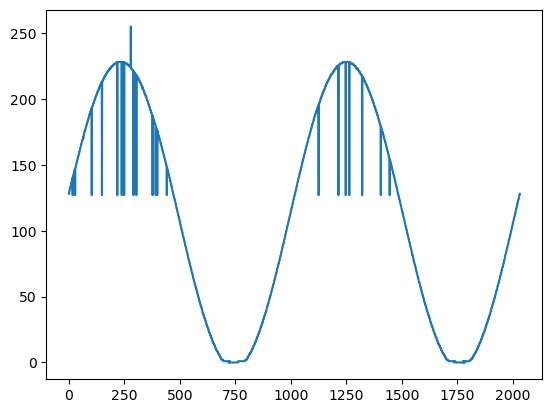

In [65]:
#convert bin to dec by dotting with a transform vector
timer_filtered
bin_to_dec_vect = np.array([1, 2, 4, 8, 16, 32, 64, 128])
result = np.sum(timer_filtered * bin_to_dec_vect, axis=1) #sum along hor axis
plt.plot(result) # not scaled yet

In [66]:
min = 0.2
max = 2.8
interval =(max - min) / (2**8 - 1) #8bit resolution ADC, the resolution of ADC = resolution of the timer
result_scaled = min + interval * np.sum(timer_filtered * bin_to_dec_vect, axis=1)
result_scaled

array([1.50509804, 1.51529412, 1.51529412, ..., 1.49490196, 1.49490196,
       1.50509804])

In [67]:
print(result_scaled.max())
print(result_scaled.min())

2.8
0.2


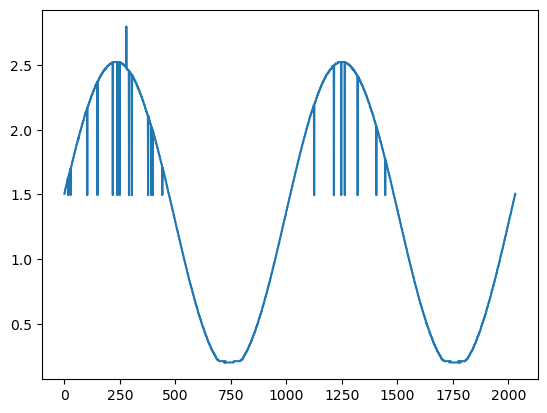

In [68]:
plt.plot(result_scaled)
# somehow the peak is still a bit less than the peak of 2.75V of the input sinuisoidal signal
# one reason may be: we try to filter the timer using rising edge and it captures too early?... maybe a little bit later than rising edge
# another reason may be: limitations of the electronic components so that the repeated ramps did not stretch high enough to capture the peak